## MAHA Kumbh mela Dataset 
- visualization

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Patch

In [176]:
df =  pd.read_csv("kumbh_mela.csv")
df.head()

,Date,City,Vehicle Count,Traffic Jam Duration (hours),Kumbh Event
0,01-01-2025,Ayodhya,200,1.5,0
1,01-01-2025,Varanasi,210,1.6,0
2,02-01-2025,Ayodhya,225,1.7,0
3,02-01-2025,Varanasi,230,1.7,0
4,03-01-2025,Ayodhya,260,1.9,0


In [177]:
A_df = df.loc[df["City"] == "Ayodhya"]
A_df.head()

,Date,City,Vehicle Count,Traffic Jam Duration (hours),Kumbh Event
0,01-01-2025,Ayodhya,200,1.5,0
2,02-01-2025,Ayodhya,225,1.7,0
4,03-01-2025,Ayodhya,260,1.9,0
6,04-01-2025,Ayodhya,240,1.8,0
8,05-01-2025,Ayodhya,400,3.5,1


In [178]:
V_df = df.loc[df["City"] == "Varanasi"]
V_df.head()

,Date,City,Vehicle Count,Traffic Jam Duration (hours),Kumbh Event
1,01-01-2025,Varanasi,210,1.6,0
3,02-01-2025,Varanasi,230,1.7,0
5,03-01-2025,Varanasi,235,1.8,0
7,04-01-2025,Varanasi,245,1.8,0
9,05-01-2025,Varanasi,420,3.8,1


#### Comparing vehicle count for both cities

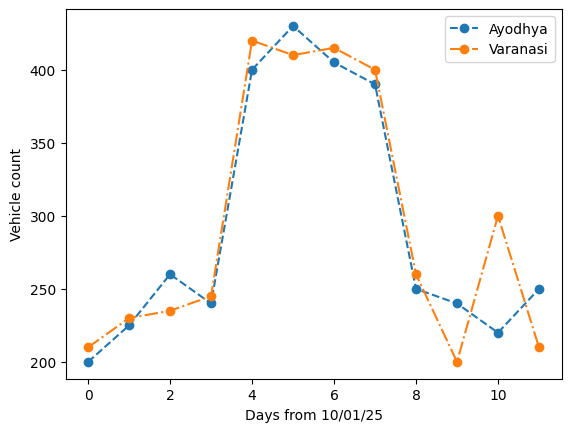

In [179]:
y1, y2 = A_df["Vehicle Count"].to_list(), V_df["Vehicle Count"].to_list()

x = [i for i in range(len(y1))]

plt.plot(x, y1, "o--", label= "Ayodhya")
plt.plot(x, y2, "o-.", label="Varanasi")

plt.ylabel("Vehicle count")
plt.xlabel("Days from 10/01/25")

plt.legend()
plt.show()

#### Scatter plot between kumbh mela and vehicle count

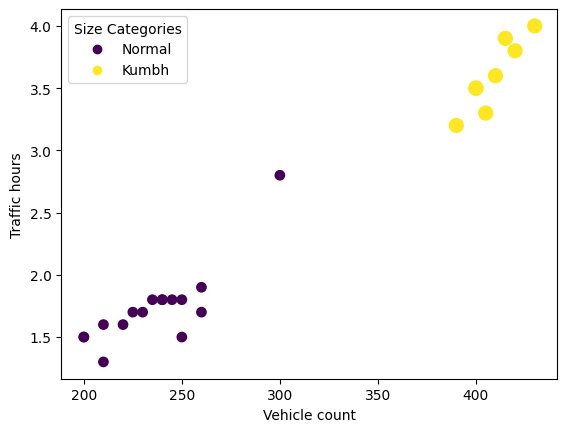

In [180]:
s = 45
sk = (df["Kumbh Event"] * (100 - s) + s).to_list()
c = sk

vk = df["Vehicle Count"].to_list()
tk = df["Traffic Jam Duration (hours)"].to_list()

scatter = plt.scatter(vk, tk, s= sk, c = sk)

plt.xlabel("Vehicle count")
plt.ylabel("Traffic hours")

color_handles, _ = scatter.legend_elements(prop='colors')

# Create the color legend with custom labels
plt.legend(handles=color_handles, labels=["Normal", "Kumbh"], title="Size Categories")

plt.show()

#### Vehicle count graph for each day of kumbh mela

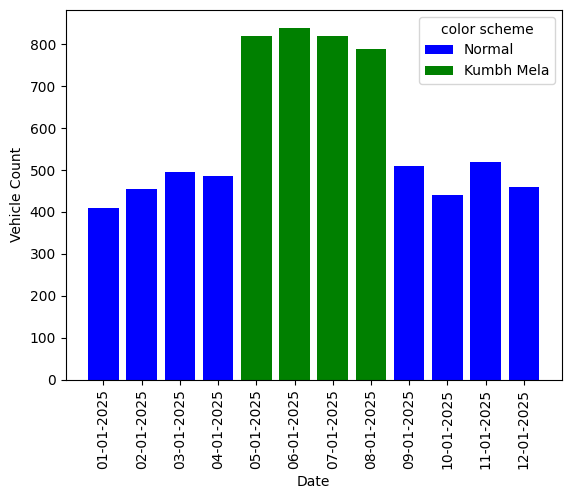

In [181]:
vehicle_counts = df.groupby('Date').agg(
    {'Vehicle Count':'sum', 'Kumbh Event': 'first'}
    ).reset_index()

#print(vehicle_counts)

x = vehicle_counts['Date']
y = vehicle_counts['Vehicle Count']

cl = ["green" if value else "blue" for value in vehicle_counts['Kumbh Event']]

# Create custom legend handles
legend_elements = [
    Patch(facecolor='blue', label='Normal'),
    Patch(facecolor='green', label='Kumbh Mela')
]

# Add the legend to the plot
plt.legend(handles=legend_elements, title='color scheme')

plt.bar(x,y, color= cl)
plt.xticks(rotation= 90)

plt.xlabel("Date")
plt.ylabel("Vehicle Count")
plt.show()